<a href="https://colab.research.google.com/github/matand380/DNN_final_project_2024/blob/main/DNN_final_project_2024_custom_binary.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to Deep Learning - Final Project** 🖥

## Team Information
- **Course:** Introduction to Deep Learning

- **Semester:** Fall 2024

- **Lectrurer:** Dr. Moshe Butman

- **Institution:** The College of Management Academic Studies

- **Team Members:** Eviatar Didon 313205387, Matan Drabkin 201416690

## Project Overview

### Objective

This project centers around the application of deep learning techniques to classify chest X-ray images into distinct categories,

with a specific emphasis on differentiating between healthy cases and those diagnosed with pneumonia.

The dataset for training and evaluation includes a total of 5863 X-ray images, categorized as follows:

- A. **Healthy**
- B. **Pneumonia**
  - Bacterial Pneumonia
  - Viral Pneumonia



# Dataset Downloading and Exploration

### Prerequisites

Execute the code cell below to download the dataset ZIP file from Google Drive and extract its contents.

In [2]:
import gdown

file_id = '1-7nq09-oeUTz5wk5hUre3wEiDfuESb52'

output_path = '/content/chest-xray-pneumonia.zip'  # Adjust the output path as needed

gdown.download(f'https://drive.google.com/uc?id={file_id}', output_path, quiet=False)

!unzip chest-xray-pneumonia.zip

Downloading...
From (original): https://drive.google.com/uc?id=1-7nq09-oeUTz5wk5hUre3wEiDfuESb52
From (redirected): https://drive.google.com/uc?id=1-7nq09-oeUTz5wk5hUre3wEiDfuESb52&confirm=t&uuid=14b0fdd2-fce7-4cb0-ba1a-5954657f0d72
To: /content/chest-xray-pneumonia.zip
100%|██████████| 2.46G/2.46G [00:30<00:00, 80.0MB/s]


Streaming output truncated to the last 5000 lines.
  inflating: chest_xray/train/NORMAL/IM-0435-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0435-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0437-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0438-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001-0002.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0439-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0440-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0441-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0442-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0444-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0445-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0446-0001.jpeg  
  inflating: chest_xray/train/NORMAL/IM-0447-0001.jpeg  
  inflating:

In [ ]:
import os

# Define the path to the ZIP file
zip_file_path = 'chest-xray-pneumonia.zip'

# Unzip the file and suppress the output
unzip_command = f'unzip {zip_file_path} -d . > /dev/null'

# Execute the unzip command
return_code = os.system(unzip_command)

# Check if the unzipping succeeded
if return_code == 0:
    print("Unzipping successful!")
else:
    print("Unzipping failed.")


### Data exploration

Let's begin by exploring a selection of images accompanied by brief explanations about the dataset.

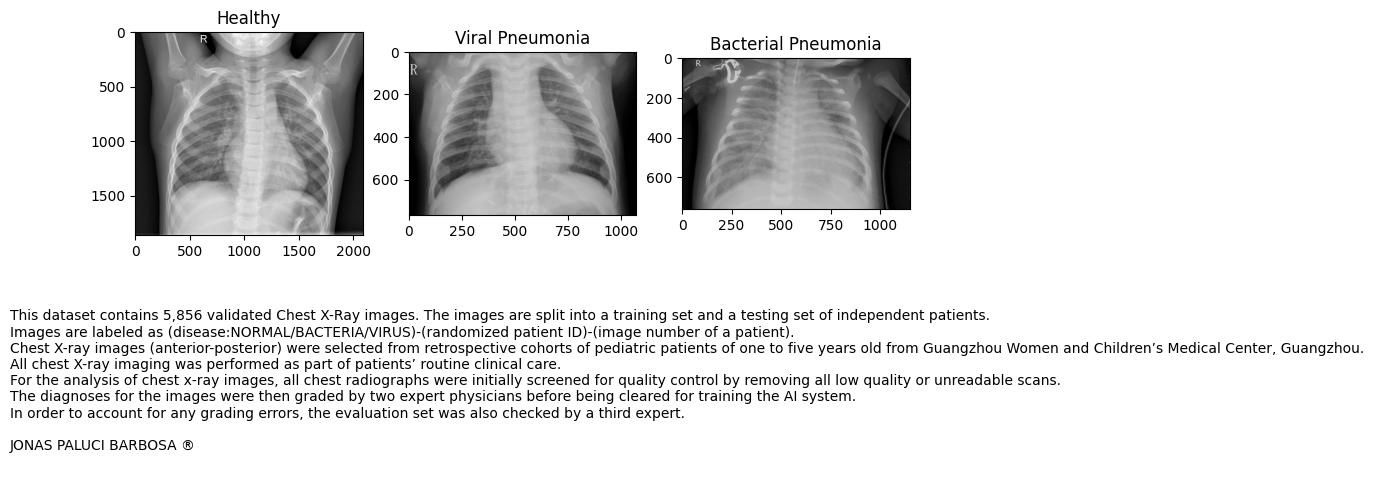

In [3]:
import cv2
import os
import matplotlib.pyplot as plt

healthy_image_path = '/content/chest_xray/train/NORMAL/IM-0115-0001.jpeg'
viral_pneumonia_image_path = '/content/chest_xray/train/PNEUMONIA/person1000_virus_1681.jpeg'
bacterial_pneumonia_image_path = '/content/chest_xray/train/PNEUMONIA/person1000_bacteria_2931.jpeg'

healthy_image = cv2.imread(healthy_image_path)
viral_pneumonia_image = cv2.imread(viral_pneumonia_image_path)
bacterial_pneumonia_image = cv2.imread(bacterial_pneumonia_image_path)

# Convert BGR images to RGB
healthy_image = cv2.cvtColor(healthy_image, cv2.COLOR_BGR2RGB)
viral_pneumonia_image = cv2.cvtColor(viral_pneumonia_image, cv2.COLOR_BGR2RGB)
bacterial_pneumonia_image = cv2.cvtColor(bacterial_pneumonia_image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 5))

plt.subplot(1, 3, 1)
plt.imshow(healthy_image)
plt.title('Healthy')

plt.subplot(1, 3, 2)
plt.imshow(viral_pneumonia_image)
plt.title('Viral Pneumonia')

plt.subplot(1, 3, 3)
plt.imshow(bacterial_pneumonia_image)
plt.title('Bacterial Pneumonia')
text = """
This dataset contains 5,856 validated Chest X-Ray images. The images are split into a training set and a testing set of independent patients.
Images are labeled as (disease:NORMAL/BACTERIA/VIRUS)-(randomized patient ID)-(image number of a patient).
Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou.
All chest X-ray imaging was performed as part of patients’ routine clinical care.
For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans.
The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system.
In order to account for any grading errors, the evaluation set was also checked by a third expert.

JONAS PALUCI BARBOSA ®
"""

plt.figtext(0.0, -0.000000000015, text, size=10, ha="left", va="center")


plt.show()


Let's examine the distribution of targets within each set.

In [9]:
import os
import pandas as pd

def create_dataframe_from_directory(directory):
    file_paths = []
    labels = []
    for label in os.listdir(directory):
        label_dir = os.path.join(directory, label)
        for file_name in os.listdir(label_dir):
            file_path = os.path.join(label_dir, file_name)
            file_paths.append(file_path)
            labels.append(label)
    return pd.DataFrame({'file_path': file_paths, 'class': labels})

# Paths
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

# DataFrames
train_df = create_dataframe_from_directory(train_dir)
val_df = create_dataframe_from_directory(val_dir)
test_df = create_dataframe_from_directory(test_dir)

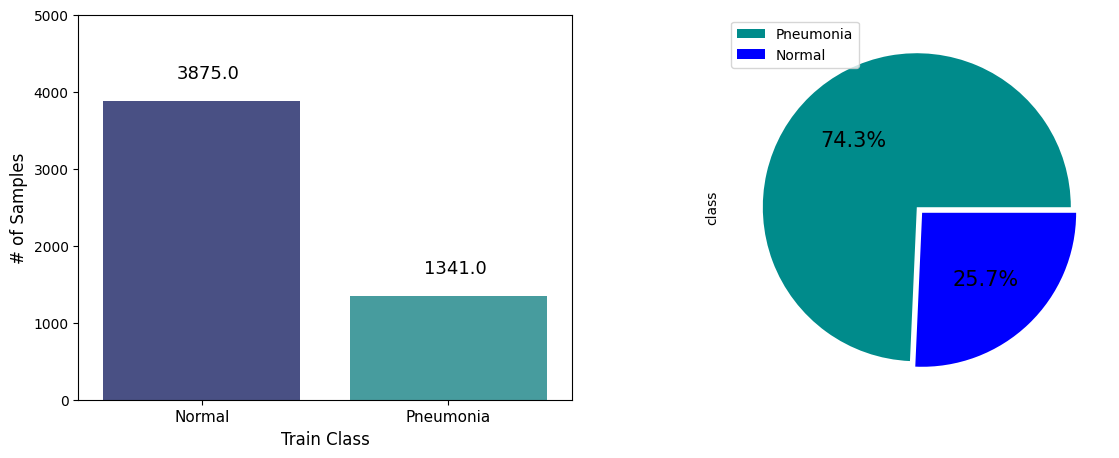

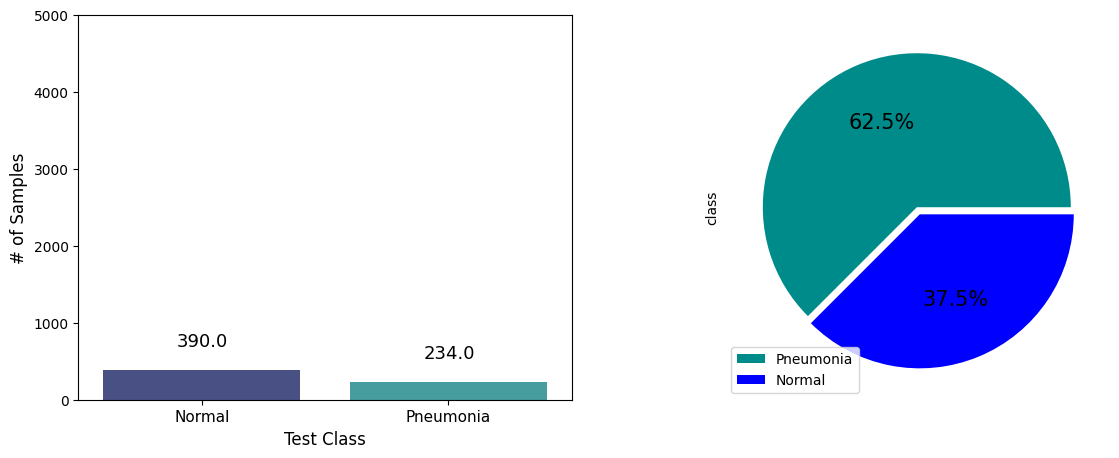

In [22]:
#Graphs for the train set
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = sns.countplot(x='class', hue='class', data=train_df, palette="mako", ax=axes[0], legend=False)
ax1.set_xlabel("Train Class", fontsize=12)
ax1.set_ylabel("# of Samples", fontsize=12)
ax1.set_ylim(0, 5000)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Normal', 'Pneumonia'], fontsize=11)

for p in ax1.patches:
    ax1.annotate((p.get_height()), (p.get_x() + 0.30, p.get_height() + 300), fontsize=13)

ax2 = axes[1]
train_df['class'].value_counts().plot(kind='pie', labels=['', ''], autopct='%1.1f%%', colors=['darkcyan', 'blue'],
                                      explode=[0, 0.05], textprops={"fontsize": 15})
ax2.legend(labels=['Pneumonia', 'Normal'])

plt.show()

#Graphs for the test set
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

ax1 = sns.countplot(x='class', hue='class', data=test_df, palette="mako", ax=axes[0], legend=False)
ax1.set_xlabel("Test Class", fontsize=12)
ax1.set_ylabel("# of Samples", fontsize=12)
ax1.set_ylim(0, 5000)
ax1.set_xticks([0, 1])
ax1.set_xticklabels(['Normal', 'Pneumonia'], fontsize=11)

for p in ax1.patches:
    ax1.annotate((p.get_height()), (p.get_x() + 0.30, p.get_height() + 300), fontsize=13)


ax2 = axes[1]
test_df['class'].value_counts().plot(kind='pie', labels=['', ''], autopct='%1.1f%%', colors=['darkcyan', 'blue'],
                                      explode=[0, 0.05], textprops={"fontsize": 15})
ax2.legend(labels=['Pneumonia', 'Normal'])

plt.show()


# Binary classification - Healthy vs Pneumonia
In this section, the aim is to implement a binary classification neural network to distinguish between healthy and diseased images.

## Preprocessing - Data augmentation and normalization

In [23]:
import os
import pandas as pd
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split

# Paths
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

# ImageDataGenerator for data augmentation and normalization
train_datagen = ImageDataGenerator(
    rescale=1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
)

val_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

batch_size = 32

## Reorganization of the data

In the original data there's only 16 samples for the validation set. At the first training we got overfitting so we reorganized the samples in order to get more balanced data.

In [24]:
import random

# We load all file paths in the training and validation directories and combine them
all_train_files = []
for root, dirs, files in os.walk(train_dir):
    all_train_files.extend([os.path.join(root, file) for file in files])

all_val_files = []
for root, dirs, files in os.walk(val_dir):
    all_val_files.extend([os.path.join(root, file) for file in files])

all_files = all_train_files + all_val_files

random.shuffle(all_files)

labels = [os.path.basename(os.path.dirname(file)) for file in all_files]

# Split the into training and validation sets
train_files, val_files, train_labels, val_labels = train_test_split(
    all_files, labels, test_size=0.2, random_state=42, stratify=labels
)

# DataGenerators for training and validation
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_files, 'class': train_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
    shuffle=True

)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_files, 'class': val_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
     shuffle=False
)

# Test generator for evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='binary',
     shuffle=False

)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 images belonging to 2 classes.


## Custom Model from scratch


- We tried setting the lreaning rate to 0.01 but we got worse results than 0.
001 (which is the default for Adam optimizer). Afterwards we changed it to 0.0001.

- We discovered that adding more convolutional layers improve the network ability to learn more hierarchical features and got much better results.

- We increased the dense layer from 128 to 2048 because we thought we are loosing important information. afterwards we added one more dense layer.

In [34]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization, Activation
from keras.optimizers import Adam
from keras.regularizers import l2



model = Sequential()

model.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(32, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(64, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(Conv2D(128, (3, 3), activation='relu', padding='same', kernel_regularizer=l2(0.01)))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.4))

model.add(Flatten(name='ev'))
model.add(Dense(2048, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))
model.add(Dense(2048, activation='relu', kernel_regularizer=l2(0.01)))
model.add(Dropout(0.2))


model.add(Dense(1, activation='sigmoid'))

optimizer = Adam(learning_rate=0.0001)
model.compile(optimizer=optimizer, loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_30 (Conv2D)          (None, 224, 224, 32)      896       
                                                                 
 conv2d_31 (Conv2D)          (None, 224, 224, 32)      9248      
                                                                 
 max_pooling2d_15 (MaxPooli  (None, 112, 112, 32)      0         
 ng2D)                                                           
                                                                 
 dropout_25 (Dropout)        (None, 112, 112, 32)      0         
                                                                 
 conv2d_32 (Conv2D)          (None, 112, 112, 64)      18496     
                                                                 
 conv2d_33 (Conv2D)          (None, 112, 112, 64)      36928     
                                                      

In [15]:
import os
from google.colab import drive

drive.mount('/content/gdrive')

drive_path = '/content/gdrive/My Drive/Colab Notebooks/DNN_final_project_2024'

Mounted at /content/gdrive


In [35]:

from keras.callbacks import EarlyStopping, ModelCheckpoint

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(f'{drive_path}/binary_best_model.h5', save_best_only=True)

history = model.fit(
    train_generator,
    epochs=10,
    steps_per_epoch=len(train_generator),
    validation_data=val_generator,
    validation_steps=len(val_generator),
    callbacks=[early_stopping, model_checkpoint]
)


Epoch 1/10
131/131 [==============================] - ETA: 0s - loss: 24.3077 - accuracy: 0.7524

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


131/131 [==============================] - 137s 1s/step - loss: 24.3077 - accuracy: 0.7524 - val_loss: 10.5791 - val_accuracy: 0.9054
Epoch 2/10
131/131 [==============================] - 140s 1s/step - loss: 7.1694 - accuracy: 0.8456 - val_loss: 4.7143 - val_accuracy: 0.9160
Epoch 3/10
131/131 [==============================] - 148s 1s/step - loss: 3.4132 - accuracy: 0.8693 - val_loss: 2.4432 - val_accuracy: 0.9150
Epoch 4/10
131/131 [==============================] - 138s 1s/step - loss: 1.9309 - accuracy: 0.8705 - val_loss: 1.5852 - val_accuracy: 0.9140
Epoch 5/10
131/131 [==============================] - 142s 1s/step - loss: 1.2966 - accuracy: 0.8786 - val_loss: 1.0643 - val_accuracy: 0.9217
Epoch 6/10
131/131 [==============================] - 140s 1s/step - loss: 0.9942 - accuracy: 0.8812 - val_loss: 0.8654 - val_accuracy: 0.9293
Epoch 7/10
131/131 [==============================] - 159s 1s/step - loss: 0.8329 - accuracy: 0.8808 - val_loss: 0.6861 - val_accuracy: 0.9331
Epoch 8/

In [36]:
print("Training Accuracy:", round(history.history['accuracy'][-1], 3))
print("Training Loss:", round(history.history['loss'][-1], 3))
print("Validation Accuracy:", round(history.history['val_accuracy'][-1], 3))
print("Validation Loss:", round(history.history['val_loss'][-1], 3))

Training Accuracy: 0.902
Training Loss: 0.57
Validation Accuracy: 0.951
Validation Loss: 0.438


In [37]:
model.save(f'{drive_path}/binary_best_model.h5')

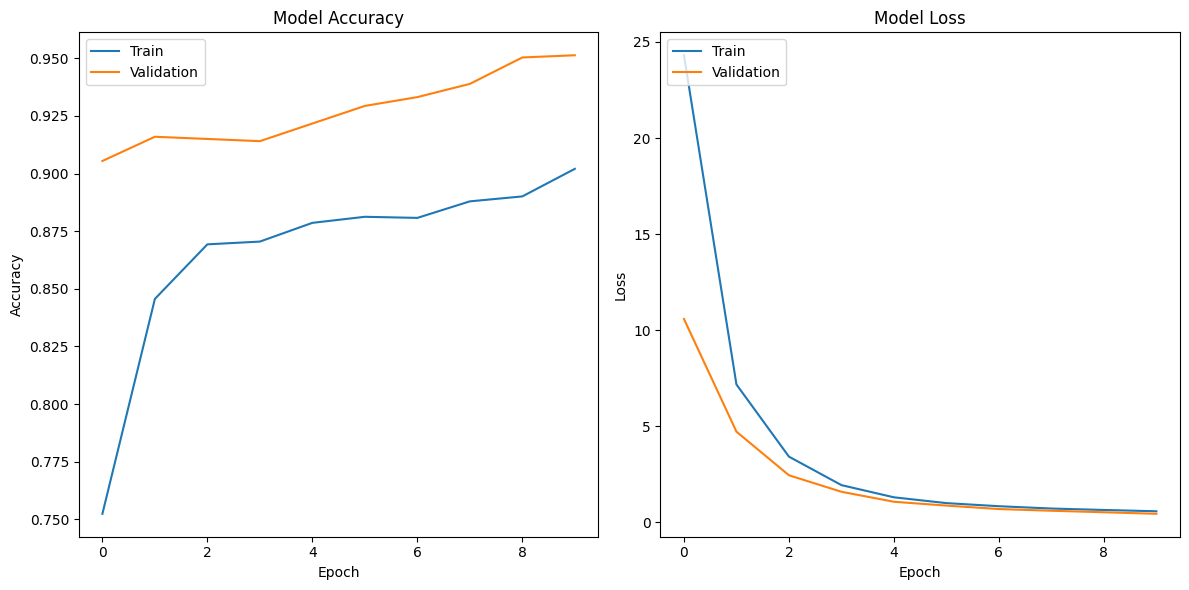

In [38]:
import matplotlib.pyplot as plt

# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

# Show the plots
plt.tight_layout()
plt.show()


### Evaluate the model

In [39]:
from keras.models import load_model

binary_model = load_model(f'{drive_path}/binary_best_model.h5')
binary_model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

evaluation_result = binary_model.evaluate(test_generator, steps=len(test_generator))

test_loss = evaluation_result[0]
test_accuracy = evaluation_result[1]

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


20/20 [==============================] - 7s 264ms/step - loss: 0.6494 - accuracy: 0.8766
Test Loss: 0.6494
Test Accuracy: 87.66%


20/20 [==============================] - 5s 189ms/step
Accuracy: 83.33%


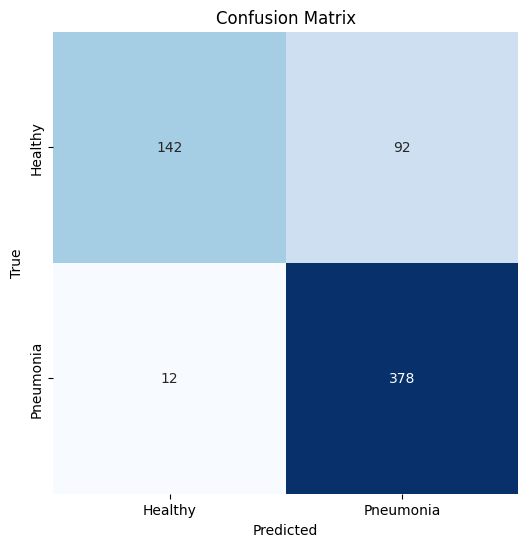

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Make predictions on the test set
y_pred_prob = binary_model.predict(test_generator)
y_pred = (y_pred_prob > 0.5)

# Get true labels from the test generator
y_true = test_generator.classes
accuracy = accuracy_score(y_true, y_pred)
print(f'Accuracy: {accuracy * 100:.2f}%')

# Define class labels
class_labels = ['Healthy', 'Pneumonia']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

20/20 [==============================] - 4s 184ms/step


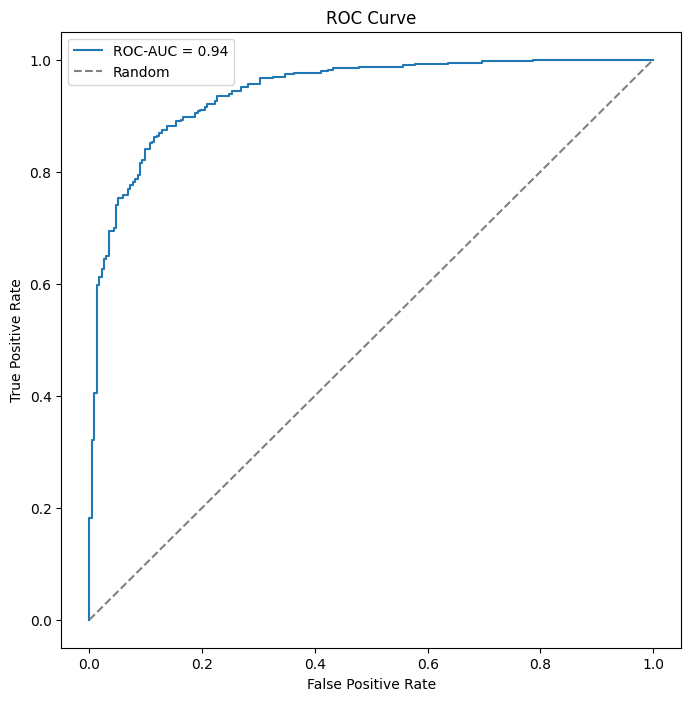

In [ ]:
from sklearn.metrics import roc_auc_score, roc_curve
import matplotlib.pyplot as plt

# Make predictions on the test set
y_pred_prob = binary_model.predict(test_generator)

# Extract true labels
y_true = test_generator.classes

# Compute ROC-AUC score
roc_auc = roc_auc_score(y_true, y_pred_prob)

# Compute ROC curve
fpr, tpr, thresholds = roc_curve(y_true, y_pred_prob)

# Plot ROC curve
plt.figure(figsize=(8, 8))
plt.plot(fpr, tpr, label=f'ROC-AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()


## Transfer learning model

In [ ]:
import numpy as np
import pandas as pd
import os
import keras
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras import layers, models
from keras.layers import Dense, GlobalAveragePooling2D
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Model
from tensorflow.keras.optimizers import Adam
import random
from sklearn.model_selection import train_test_split


In [ ]:
# Paths
train_dir = '/content/chest_xray/train'
val_dir = '/content/chest_xray/val'
test_dir = '/content/chest_xray/test'

# We load all file paths in the training and validation directories and combine them
all_train_files = []
for root, dirs, files in os.walk(train_dir):
    all_train_files.extend([os.path.join(root, file) for file in files])

all_val_files = []
for root, dirs, files in os.walk(val_dir):
    all_val_files.extend([os.path.join(root, file) for file in files])

all_files = all_train_files + all_val_files

random.shuffle(all_files)

labels = [os.path.basename(os.path.dirname(file)) for file in all_files]

# Split the into training and validation sets
train_files, val_files, train_labels, val_labels = train_test_split(
    all_files, labels, test_size=0.2, random_state=42, stratify=labels
)

train_datagen_tl = ImageDataGenerator(preprocessing_function=preprocess_input)

train_generator = train_datagen_tl.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_files, 'class': train_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    color_mode='rgb',
    batch_size=32,
    class_mode='binary',
    shuffle=True
)

val_datagen_tl = ImageDataGenerator(preprocessing_function=preprocess_input)
val_generator = val_datagen_tl.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_files, 'class': val_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False

)

test_datagen_tl = ImageDataGenerator(preprocessing_function=preprocess_input)
# Test generator for evaluation
test_generator = test_datagen_tl.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=32,
    class_mode='binary',
    color_mode='rgb',
    shuffle=False

)

Found 4185 validated image filenames belonging to 2 classes.
Found 1047 validated image filenames belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
base_model = MobileNet(weights='imagenet', include_top=False)

In [ ]:
tl_model = base_model.output
tl_model=GlobalAveragePooling2D()(tl_model)
tl_model=Dense(units=1024, activation='relu')(tl_model)
tl_model=Dense(units=1024, activation='relu')(tl_model)
tl_model=Dense(units=512, activation='relu')(tl_model)
preds = Dense(1, activation='sigmoid')(tl_model)

In [ ]:
final_model= Model(inputs=base_model.input,outputs=preds)

In [ ]:
for layer in final_model.layers[:-4]:
  layer.trainable=False

In [ ]:
from tensorflow.keras.applications.mobilenet import preprocess_input

pretrained model allows us to use bigger images

In [ ]:
final_model.compile(optimizer='Adam', loss='binary_crossentropy', metrics=['accuracy'])
final_model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, None, None, 3)]   0         
                                                                 
 conv1 (Conv2D)              (None, None, None, 32)    864       
                                                                 
 conv1_bn (BatchNormalizati  (None, None, None, 32)    128       
 on)                                                             
                                                                 
 conv1_relu (ReLU)           (None, None, None, 32)    0         
                                                                 
 conv_dw_1 (DepthwiseConv2D  (None, None, None, 32)    288       
 )                                                               
                                                                 
 conv_dw_1_bn (BatchNormali  (None, None, None, 32)    128 

In [ ]:
from keras.callbacks import EarlyStopping, ModelCheckpoint

early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)
model_checkpoint = ModelCheckpoint(f'{drive_path}/tl_best_model.h5', save_best_only=True)

spe = train_generator.n // train_generator.batch_size
spe_val = val_generator.n // val_generator.batch_size
history_tl = final_model.fit(train_generator, steps_per_epoch=spe, epochs=7, validation_data=val_generator, validation_steps=spe_val, callbacks=[early_stopping, model_checkpoint])

Epoch 1/7
130/130 [==============================] - ETA: 0s - loss: 0.1933 - accuracy: 0.9379

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


130/130 [==============================] - 51s 370ms/step - loss: 0.1933 - accuracy: 0.9379 - val_loss: 0.0922 - val_accuracy: 0.9707
Epoch 2/7
130/130 [==============================] - 51s 390ms/step - loss: 0.0865 - accuracy: 0.9653 - val_loss: 0.0713 - val_accuracy: 0.9746
Epoch 3/7
130/130 [==============================] - 45s 350ms/step - loss: 0.0687 - accuracy: 0.9745 - val_loss: 0.0719 - val_accuracy: 0.9697
Epoch 4/7
130/130 [==============================] - 46s 355ms/step - loss: 0.0593 - accuracy: 0.9793 - val_loss: 0.0434 - val_accuracy: 0.9863
Epoch 5/7
130/130 [==============================] - 46s 354ms/step - loss: 0.0519 - accuracy: 0.9827 - val_loss: 0.0745 - val_accuracy: 0.9795
Epoch 6/7
130/130 [==============================] - 48s 372ms/step - loss: 0.0507 - accuracy: 0.9815 - val_loss: 0.0404 - val_accuracy: 0.9873
Epoch 7/7
130/130 [==============================] - 45s 349ms/step - loss: 0.0383 - accuracy: 0.9865 - val_loss: 0.0617 - val_accuracy: 0.9795


In [ ]:
print("Transfer learning metrics:")
print("Training Accuracy:", round(history_tl.history['accuracy'][-1], 3))
print("Training Loss:", round(history_tl.history['loss'][-1], 3))
print("Validation Accuracy:", round(history_tl.history['val_accuracy'][-1], 3))
print("Validation Loss:", round(history_tl.history['val_loss'][-1], 3))

Transfer learning metrics:
Training Accuracy: 0.987
Training Loss: 0.038
Validation Accuracy: 0.979
Validation Loss: 0.062


In [ ]:
from keras.models import load_model

model_tl = load_model(f'{drive_path}/tl_best_model.h5')
model_tl.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

evaluation_result = model_tl.evaluate(test_generator, steps=(len(test_generator)))

test_loss = evaluation_result[0]
test_accuracy = evaluation_result[1]

print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy * 100:.2f}%')


20/20 [==============================] - 5s 216ms/step - loss: 0.8405 - accuracy: 0.8221
Test Loss: 0.8405
Test Accuracy: 82.21%


20/20 [==============================] - 6s 264ms/step
0.8221153846153846


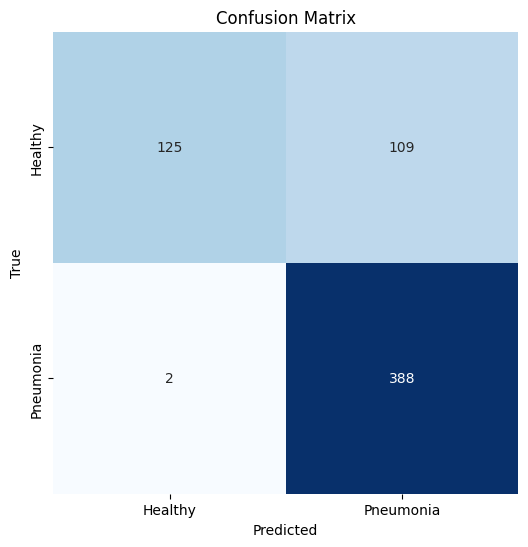

In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import load_model
from keras.preprocessing.image import ImageDataGenerator

# Make predictions on the test set
y_pred_prob = model_tl.predict(test_generator)
y_pred = (y_pred_prob > 0.5).astype(int).flatten()

# Get true labels from the test generator
y_true = test_generator.classes
accuracy = accuracy_score(y_true, y_pred)
print(accuracy)

# Define class labels
class_labels = ['Healthy', 'Pneumonia']

# Compute confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot the confusion matrix using seaborn
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
            xticklabels=class_labels,
            yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

# Multi-class classification - Healthy, Viral and Bacteria
In this task, the objective is to address the problem using a deep neural network for multi-class classification. The network will categorize images into three classes: healthy, diseased with viral pneumonia, and diseased with bacterial pneumonia.

## Modify data preparation

In [ ]:
# DataGenerators for training and validation
train_generator = train_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': train_files, 'class': train_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

val_generator = val_datagen.flow_from_dataframe(
    dataframe=pd.DataFrame({'filename': val_files, 'class': val_labels}),
    x_col='filename',
    y_col='class',
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# Test generator for evaluation
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(224, 224),
    batch_size=batch_size,
    class_mode='categorical'
)

# KNN classification
In the subsequent code, we will demonstrate the application of a previously identified successful neural network for classifying new images. The process involves leveraging the embedding vector generated by the classification network and implementing KNN for image classification.

# Anomaly Detection
In this section, we exclusively possess data for "healthy" images. The objective is to implement anomaly detection techniques to identify potentially "diseased" images. By training models on healthy images and detecting deviations or reconstruction errors, we aim to uncover anomalies indicative of diseases or abnormalities.